# Лабораторная №1. Основы предобработки данных 

Используйте файл своей группы. <br>
Загрузите его в DataFrame и ответьте на вопросы, используя инстурменты из файла Preprocessing basics.ipynb (и не только).


#### Вопросы
1. В какой шкале представлены все признаки в наборе?<br>
2. Укажите признак с наименьшей дисперсией.<br>
3. Медиана какого признака отличается для двух классов сильнее всего?<br>
4. В каком классе больше всего unskilled работников мужского рода?<br>
5. Есть ли в наборе признаки с выбросами? Какие?<br>
6. Сколько пропущенных значений в наборе? Как они обозначены <br>
7. Попытайтесь заполнить пропущенные значения минимум двумя способами.<br>
8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.<br>
9. Проанализируйте взаимосвязи признаков с помощью scatter plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?<br>
10. Какой признак(и) имеет смысл стандартизировать? Почему?<br>
11. Какой признак(и) (если такой(ие) есть) кажется вам проблематичным? Что бы вы предложили с ним сделать?<br>
12. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.<br>

**German Credit data** <br>
This dataset classifies people described by a set of attributes as good or bad credit risks ('class' attribute). <br>
1. checking_status -  Status of existing checking account, in Deutsche Mark.
2. duration - Duration in months
3. credit_history - Credit history (credits taken, paid back duly, delays, critical accounts)
4. purpose - Purpose of the credit (car, television,…)
5. credit_amount - Credit amount
6. savings_status - Status of savings account/bonds, in Deutsche Mark.
7. employment - Present employment, in number of years.
8. installment_commitment - Installment rate in percentage of disposable income
9. personal_status - Personal status (married, single,…) and sex
10. other_parties - Other debtors / guarantors
11. property_magnitude - Property (e.g. real estate)
12. age - Age in years
13. other_payment_plans - Other installment plans (banks, stores)
14. housing - Housing (rent, own,…)
15. existing_credits - Number of existing credits at this bank
16. job - Job
17. num_dependents - Number of people being liable to provide maintenance for
18. own_telephone - Telephone (yes,no)
19. foreign_worker - Foreign worker (yes,no)

In [183]:


import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

np.set_printoptions(precision=3)
pd.set_option('display.precision', 3)

sns.set()

In [184]:
path='credit_3530203_80101.csv'
credit_df = pd.read_csv(path, index_col=0)

In [131]:
credit_df.dtypes

**1.В какой шкале представлены все признаки в наборе?**

In [132]:
credit_df.describe()

,duration,credit_amount,residence_since,age,existing_credits,num_dependents
count,501.000,501.00,501.000,501.000,501.000,501.000
mean,20.315,3192.22,2.782,35.511,1.393,1.144
std,12.103,2839.16,1.162,11.466,0.568,0.351
min,4.000,-999.00,-1.000,19.000,1.000,1.000
25%,12.000,1318.00,2.000,27.000,1.000,1.000
50%,18.000,2241.00,3.000,33.000,1.000,1.000
75%,24.000,3915.00,4.000,41.000,2.000,1.000
max,60.000,15945.00,4.000,75.000,4.000,2.000


Checking_status: ordinal <br>
Duration: interval <br>
Credit_history: nominal<br>
Credit_amount: ratio<br>
Employment: ordinal<br>
Personal_status: nominal<br>
Other_parties: nominal<br>
Residence_since: ratio<br>
Property_magnitude: nominal<br>
Age: ratio<br>
Housing: nominal<br>
Existing_credits: ratio<br>
Job: nominal<br>
Num_dependents: ratio<br>
Own_telephone: binary<br>
Foreign_worker: binary<br>
Class: binary<br>

**2.Укажите признак с наименьшей дисперсией.**

In [186]:
credit_df.var()

<ipython-input-186-7185ef021608>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  credit_df.var()


In [134]:
credit_df.var().idxmin()

<ipython-input-134-b2282f885f83>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  credit_df.var().idxmin()


'num_dependents'

**3. Медиана какого признака отличается для двух классов сильнее всего?**

In [179]:
filter_good = credit_df['class'].isin(['good'])
filter_bad = credit_df['class'].isin(['bad'])
bad_median = credit_df[filter_bad].median()
bad_median



<ipython-input-179-622721a48e4a>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  bad_median = credit_df[filter_bad].median()


In [178]:
good_median = credit_df[filter_good].median()
good_median

<ipython-input-178-6b0282d6ce1c>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  good_median = credit_df[filter_good].median()


In [181]:
((bad_median/good_median)*100-100).abs()

**Ответ: Duration**

4. В каком классе больше всего unskilled работников мужского рода?

In [138]:
filter_male = credit_df['personal_status'].str.startswith('male')
filter_unskilled = credit_df['job'].str.startswith('unskilled')


In [139]:
df_filter_bad_male = credit_df[filter_bad].merge(credit_df[filter_male])
df_filter_good_male = credit_df[filter_good].merge(credit_df[filter_male])
df_filter_bad_male_unskilled = df_filter_bad_male.merge(credit_df[filter_unskilled])
df_filter_good_male_unskilled = df_filter_good_male.merge(credit_df[filter_unskilled])

In [140]:
df_filter_bad_male_unskilled.count()

In [141]:
df_filter_good_male_unskilled.count()

**Ответ: Good**

5. Есть ли в наборе признаки с выбросами? Какие?

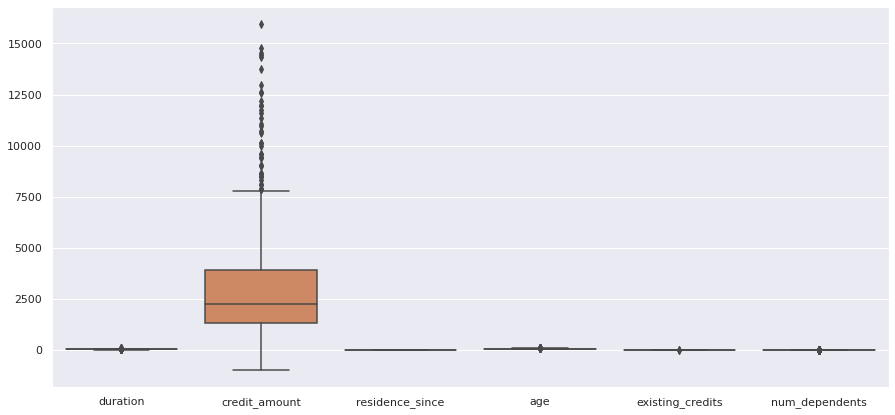

In [142]:
fig, axs = plt.subplots(figsize=(15,7))
sns.boxplot(data=credit_df)

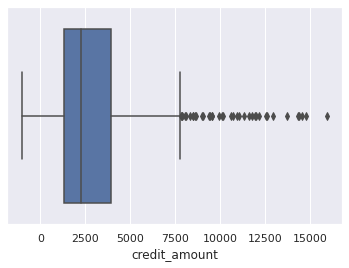

In [143]:
sns.boxplot(x='credit_amount', data=credit_df)


Считать ли выбросом 15000 на 6 месяцев?

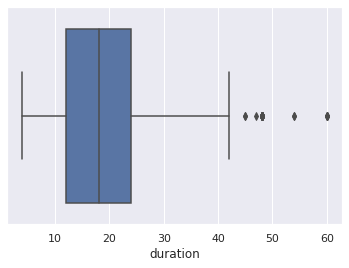

In [195]:
sns.boxplot(x='duration', data=credit_df)

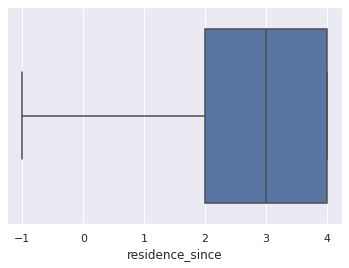

In [196]:
sns.boxplot(x='residence_since', data=credit_df)

-1 это пропуск

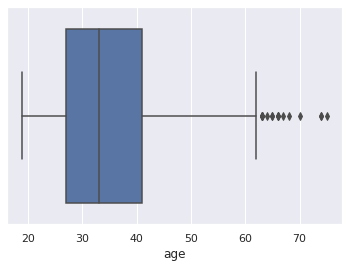

In [146]:
sns.boxplot(x='age', data=credit_df)

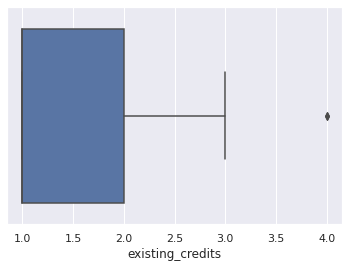

In [147]:
sns.boxplot(x='existing_credits', data=credit_df)

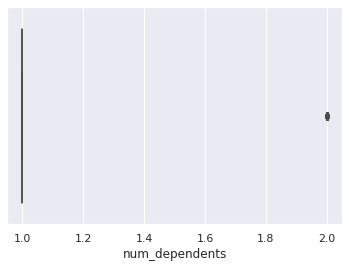

In [148]:
sns.boxplot(x='num_dependents', data=credit_df)

In [174]:
#credit_df['credit_amount'] = credit_df.credit_amount.clip(lower=credit_df.credit_amount.quantile(0.05), upper=credit_df.credit_amount.quantile(0.95))

После отсечения:

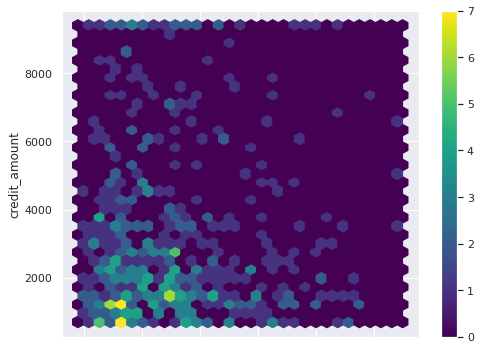

In [175]:
credit_df['credit_amount'].hist()
credit_df.plot.hexbin(x='age', y='credit_amount', gridsize=30, figsize=(8,6),  cmap='viridis')

**6. Сколько пропущенных значений в наборе? Как они обозначены**

In [151]:
(credit_df['residence_since']==-1).sum()

5

In [152]:
(credit_df['credit_amount']==-999).sum()

6

**7. Попытайтесь заполнить пропущенные значения минимум двумя способами.**

In [153]:
zero_colums = ['residence_since','credit_amount']
#credit_df[zero_colums].replace(to_replace=[-1,-999],value=np.NaN, inplace=True)
credit_df.loc[:,zero_colums] = credit_df[zero_colums].replace(to_replace=[-1,-999],value=np.NaN)
credit_df[zero_colums].isnull().sum()

**8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.**

**Nominal:** Property_magnitude

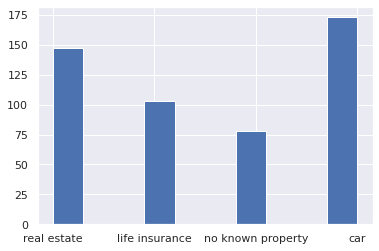

In [154]:
credit_df['property_magnitude'].hist()

**Binary**: Class

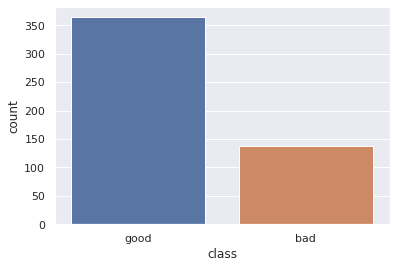

In [155]:
sns.countplot(x='class', data=credit_df)

**Ordinal**: Employment

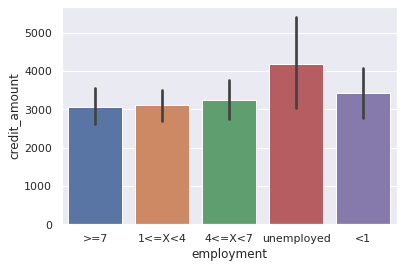

In [156]:
sns.barplot(data=credit_df,x='employment', y='credit_amount', estimator=np.mean)


**Interval:** Duration

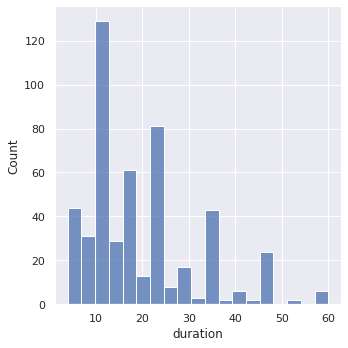

In [157]:
sns.displot(credit_df['duration'])

**Ratio**: Age

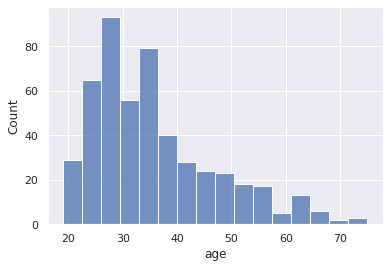

In [158]:
sns.set_style("darkgrid")
#(credit_df['duration']).plot(kind='density', layout=(1, 2), subplots=True, figsize=(10, 4), sharex=False)
sns.histplot(data=credit_df, x='age')

**9. Проанализируйте взаимосвязи признаков с помощью scatter plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?**

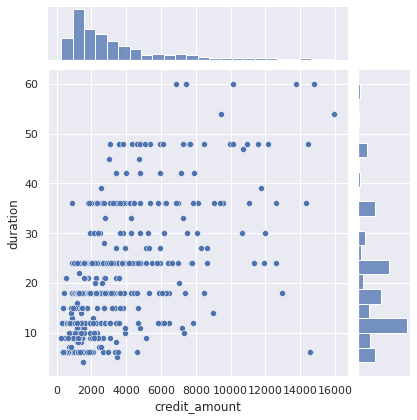

In [159]:
sns.jointplot(data=credit_df, x='credit_amount', y='duration', kind='scatter')

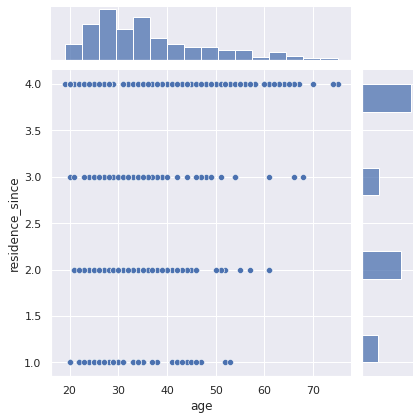

In [160]:
sns.jointplot(data=credit_df, x='age', y='residence_since', kind='scatter')

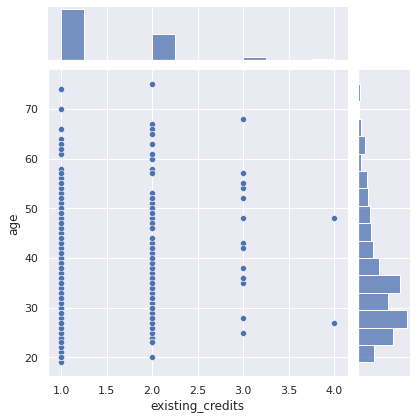

In [161]:
sns.jointplot(data=credit_df, x='existing_credits', y='age', kind='scatter')

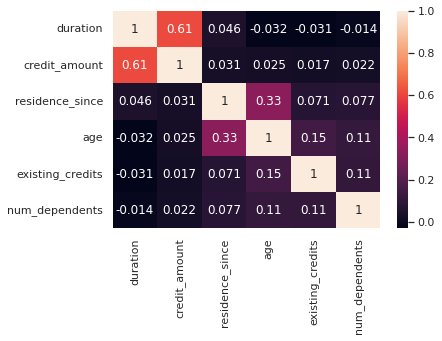

In [162]:
corr_matrix = credit_df.corr()
sns.heatmap(corr_matrix, annot=True, annot_kws={"size":12})

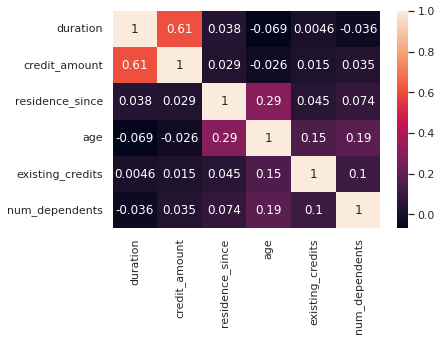

In [163]:
corr_matrix_spearman = credit_df.corr(method = 'spearman')
corr_matrix_spearman
sns.heatmap(corr_matrix_spearman, annot=True, annot_kws={"size":12})

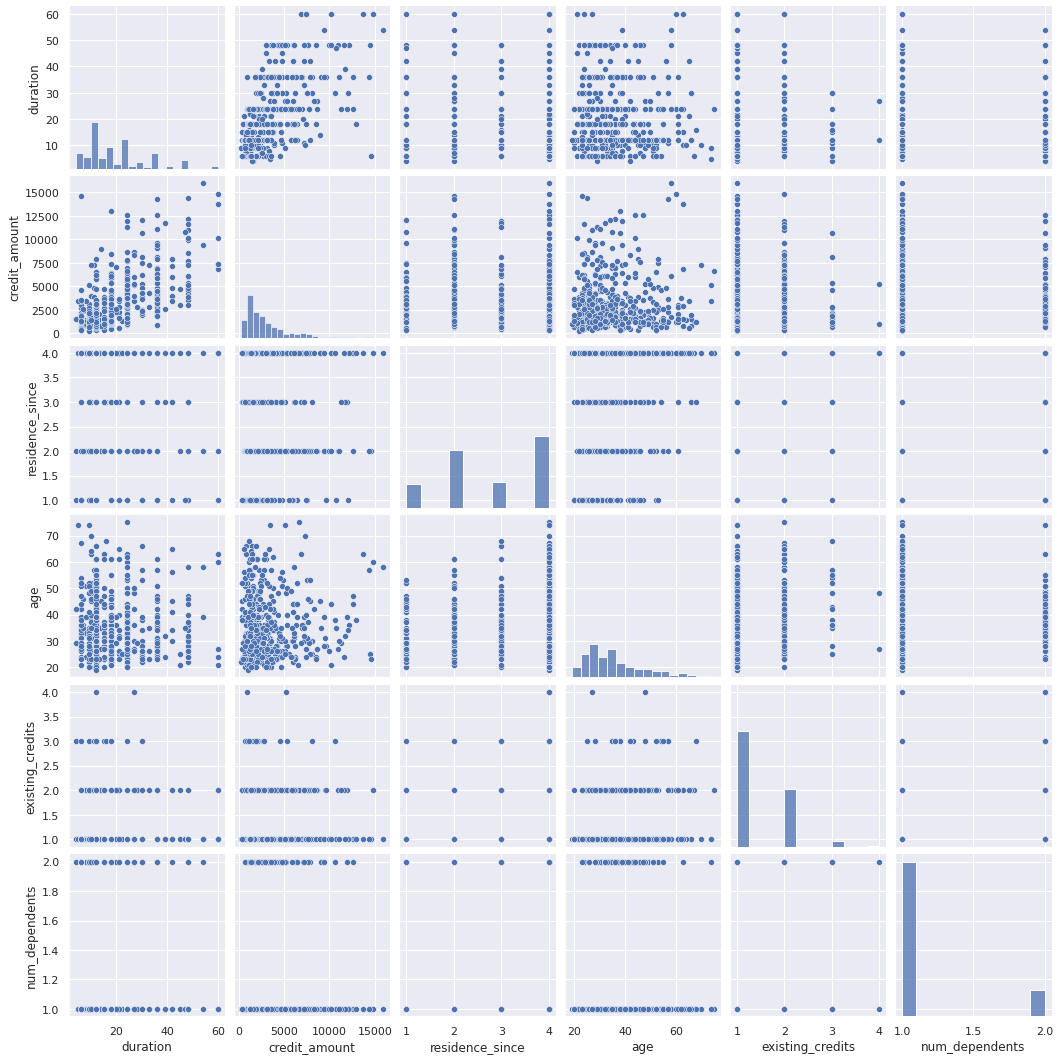

In [164]:
sns.pairplot(credit_df)

credit_amount - duration - больше кредит - больше срок<br>
num_dependents - credit_amount - чем больше иждивенцев, тем меньше сумма кредита<br>
credit_amount - age - чаще всего оформляют кредиты молодые<br>
age - duration - чем старше, тем меньше срок кредита (из-за взаимосвязи между сроком кредита и суммой)<br>
residence_since - duration - чем дольше резидент, тем на больший срок берут кредит<br>
existing_credits - duration - чем больше кредитов, тем меньше срок<br>

**10. Какой признак(и) имеет смысл стандартизировать? Почему?**

age, credit_amount и duration - для алгоритма knn в задачах классификации или регрессии

In [199]:
std_scaler = StandardScaler()

cols_std_scaled = std_scaler.fit_transform(credit_df[['duration','credit_amount','age']])
#cols_std_scaled = std_scaler.fit_transform(credit_df[['duration','credit_amount','age','residence_since','existing_credits','num_dependents']])


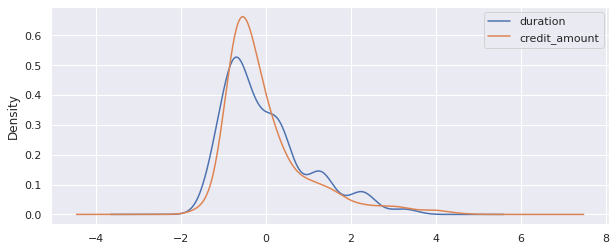

In [200]:
plt.subplots(figsize=(12,7))
sns.boxplot(data = cols_std_scaled)
credit_df_scaled = pd.DataFrame(cols_std_scaled, columns = ['duration', 'credit_amount','age'])
credit_df_scaled[['duration','credit_amount']].plot(kind = 'density', layout=(1, 2), sharex=False, figsize=(10, 4))

**11. Какой признак(и) (если такой(ие) есть) кажется вам проблематичным? Что бы вы предложили с ним сделать?**<br>
Credit_history - Плохая интерпретируемость<br>
Personal_status - Плохая интерпретируемость, несогласованность<br>
Other_parties?<br>
Job - Что значит unemp/unskilled non res?<br>


**12. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.<br>**
Зарплата<br>
Адрес проживания<br>
Судимость<br>